In [1]:
import networkx as nx
import numpy as np
import scipy.sparse as sparse
import os, sys
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_path = os.getcwd()
arxiv = nx.read_edgelist(dir_path+'/data/CA-GrQc.txt')

In [3]:
print type(arxiv)

<class 'networkx.classes.graph.Graph'>


## ) Part a. Analyzing basic properties of graph

### Number of nodes and edges:

In [4]:
num_nodes = arxiv.number_of_nodes()
print "Number of nodes in ArXiv graph: %d" %(num_nodes)

Number of nodes in ArXiv graph: 5242


In [5]:
num_edges = arxiv.number_of_edges()
print "Number of edges in ArXiv graph: %d" %(num_edges)

Number of edges in ArXiv graph: 14496


### Graph Connectivity:

In [6]:
connected_bool = nx.is_connected(arxiv)
print "Connectivity: ",
if connected_bool:
    print "Graph is connected"
else:
    print "Graph is not connected"

Connectivity:  Graph is not connected


#### Number of connected components:

In [7]:
n_cc = nx.number_connected_components(arxiv)
print "Number of connected components: ",n_cc

Number of connected components:  355


#### Distribution of sizes of connected components:

In [24]:
cc = nx.connected_components(arxiv)
len_cc = [len(item) for item in cc]

In [27]:
print Counter(len_cc)

Counter({2: 177, 3: 98, 4: 30, 5: 17, 6: 12, 7: 8, 8: 6, 9: 2, 1: 1, 10: 1, 12: 1, 14: 1, 4158: 1})


In [17]:
x, y = zip(*Counter(len_cc).items())

In [30]:
print x
print y

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 4158)
(1, 177, 98, 30, 17, 12, 8, 6, 2, 1, 1, 1, 1)


(1.0, 10000.0, -10, 1000)

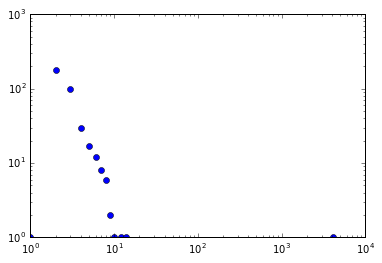

In [76]:
# axes = plt.gca()
# axes.set_xlim([0,1000])
# axes.set_ylim([0,10000])
plt.loglog(x, y, basex=10, basey=10, linestyle='None', 
           marker='o')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,-10,1000))

### Giant connected component

In [77]:
gcc = max(nx.connected_component_subgraphs(arxiv), key=len)

#### Number of nodes and edges in giant connected component:

In [78]:
gcc_num_nodes = gcc.number_of_nodes()
gcc_num_edges = gcc.number_of_edges()
print
print "Number of nodes in Giant Connected component: ",gcc_num_nodes
print "Number of edges in Giant Connected component: ",gcc_num_edges


Number of nodes in Giant Connected component:  4158
Number of edges in Giant Connected component:  13428


#### Fraction of nodes and edges:

In [79]:
print "Fraction of nodes in gcc: ", gcc_num_nodes*1.0/num_nodes
print "Fraction of edges in gcc: ", gcc_num_edges*1.0/num_edges

Fraction of nodes in gcc:  0.79320869897
Fraction of edges in gcc:  0.926324503311


*Observation:*
Thus, we observe that the giant connected component consists of more than 79% of nodes, and more than 92% of the edges. Hence, this graph follows power law for connected components.

In [80]:
degrees = {}
counts = []
for n in arxiv.nodes():
    degree_n = arxiv.degree(n)
    counts.append(degree_n)
    if degree_n not in degrees:
        degrees[degree_n] = 0
    degrees[degree_n] += 1

In [81]:
items = sorted(degrees.items())
print "Max degree is: ", items[-1][0]
print "Min degree is: ", items[0][0]
print "Mean degree is: ", np.mean(counts)
print "Median degree is: ", np.median(counts)

Max degree is:  81
Min degree is:  1
Mean degree is:  5.53071346814
Median degree is:  3.0


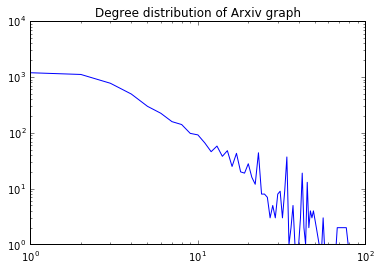

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Degree distribution of Arxiv graph")

In [83]:
## TODO:
## What is the type of distribution and what are its parameters?
## Plot log(p(k)) vs logk [ Refer slide 19 of lecture 4]

#### Triangles

In [107]:
triangles = nx.triangles(gcc)
count_triangles = sum(triangles.values())/3
print "Total number of triangles in the giant connected component: ", count_triangles

Total number of triangles in the giant connected component:  47779


In [88]:
triangle_count = {}
values = triangles.values()
for val in values:
    if val not in triangle_count:
        triangle_count[val] = 0
    triangle_count[val] += 1
triangle_items = sorted(triangle_count.items())

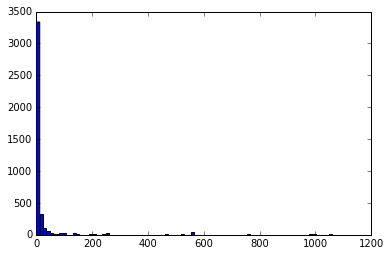

In [96]:
n, bins, patches = plt.hist(values, 100)

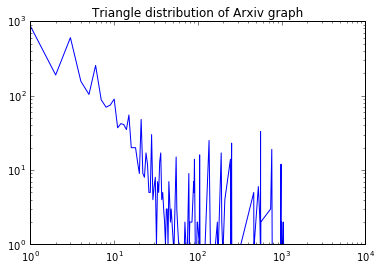

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in triangle_items], [v for (k,v) in triangle_items])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Triangle distribution of Arxiv graph")

#### Spectral counting of triangles

In [98]:
gcc_matrix = nx.to_scipy_sparse_matrix(gcc).asfptype()
print type(gcc_matrix)

<class 'scipy.sparse.csr.csr_matrix'>


In [67]:
sum(vals)

(364.06594914779748+0j)

In [99]:
k_values = range(100, 1001, 100)

In [101]:
e_vals = []
for k in k_values:
    print "Calculating for k = ",k
    vals, _ = sparse.linalg.eigs(gcc_matrix, k)
    e_vals.append(vals)

Calculating for k =  100
Calculating for k =  200
Calculating for k =  300
Calculating for k =  400
Calculating for k =  500
Calculating for k =  600
Calculating for k =  700
Calculating for k =  800
Calculating for k =  900
Calculating for k =  1000


In [110]:
def get_num_triangles(arr):
    best_approx = [np.real(v) for v in arr]
    val = sum(v**3 for v in best_approx)
    return np.abs(val - count_triangles)*1.0/count_triangles

In [111]:
errs = []
for item in e_vals:
    errs.append(get_num_triangles(item))

In [116]:
evals = nx.adjacency_spectrum(gcc)


(45.6166621763+0j)


In [124]:
def get_num_triangle(l):
    sum = 0
    for i in l:
        sum+= i**3
    sum = sum*1.0/6
    return sum

In [142]:
errs = []
for i in range(1, 1001, 1):
    temp_list = evals[:i]
    approx = get_num_triangle(temp_list)
    errs.append(np.abs(count_triangles - approx)*1.0/count_triangles)

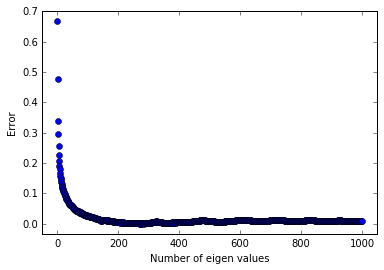

In [146]:
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(errs, 'o')
plt.xlabel("Number of eigen values")
plt.ylabel("Error")

In [147]:
e_vals_1000 = e_vals[-1]
errs2 = []
for i in range(1, len(e_vals_1000)):
    temp_list = e_vals_1000[:i]
    approx = get_num_triangle(temp_list)
    errs2.append(np.abs(count_triangles - approx)*1.0/count_triangles)

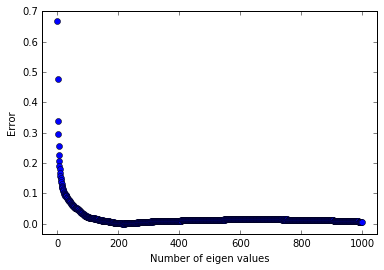

In [148]:
fig, ax = plt.subplots()
ax.margins(0.05)
ax.plot(errs2, 'o')
plt.xlabel("Number of eigen values")
plt.ylabel("Error")

In [151]:
np.savetxt("all_eigen.txt", evals)

In [155]:
e_vals_arr = np.array(e_vals)

In [159]:
thefile = open('eigen_1000.txt', 'w')
for item in e_vals:
    thefile.write("%s\n" % item)

In [153]:
type(e_vals)

list